<h1 style='color: green; font-size: 36px; font-weight: bold;'>Sample tests</h1>

## <font color='red' style='font-size: 30px;'>1.2 Effect of a sample size</font>
<hr style='border: 2px solid red;'>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
ratings = pd.read_csv('../data/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [38]:
note_average_per_movie = ratings.groupby('movieId').mean()['rating']
note_average_per_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [39]:
number_votes_per_movie = ratings.groupby('movieId').count()
number_votes_per_movie.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [40]:
movies_with_more_than_9_votes = number_votes_per_movie.query('rating >= 10').index
movies_with_more_than_9_votes.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

## MovieLens -  Average of each movie with at least 10 votes

In [41]:
note_average_movies_with_more_than_9_votes = note_average_per_movie.loc[movies_with_more_than_9_votes.values]
note_average_movies_with_more_than_9_votes

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

## Movies average with at least 10 votes

In [42]:
note_average_movies_with_more_than_9_votes.mean()

3.4320503405352603

### <font color='blue' style='font-size: 30px;'>Visualizing the change of average over time</font>

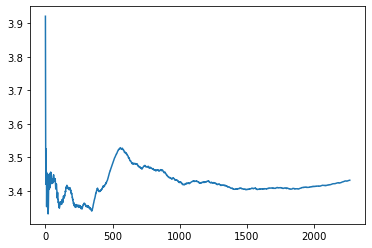

In [43]:
size = len(note_average_movies_with_more_than_9_votes)
medias = [note_average_movies_with_more_than_9_votes[0: i].mean() for i in range(1, size)]

plt.plot(medias)

### With a sample

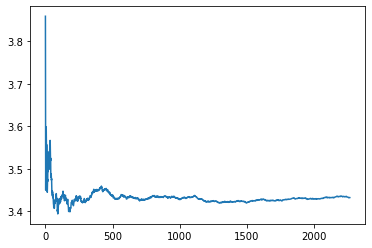

In [44]:
temp = note_average_movies_with_more_than_9_votes.sample(frac = 1, random_state = 75243)

medias = [temp[0: i].mean() for i in range(1, len(temp))]
    
plt.plot(medias)

>As the sample grows, the media are stabilized.

## <font color='red' style='font-size: 30px;'>1.3 Confidence interval</font>
<hr style='border: 2px solid red;'>

## Difference between Z-test and T-test

[Here is the difference](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/)

> <b>Z-test</b> is used in sample with more than 30 and when the population sample is known.

> <b>T-test</b> is used in sample with less than 30 and when the population sample is not known.

<p>Howeven the two tests for sample more than 30 are appeared</p>

### <font color='blue' style='font-size: 30px;'>Z-test</font>

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.
# $$e = z \frac{\sigma}{\sqrt{n}}$$

### Intervalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

In [45]:
# media = sample_media +- z * e

## Using Scipy

[method norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [46]:
from scipy.stats import norm

z = norm.ppf(0.975)
n = note_average_movies_with_more_than_9_votes.shape[0]
sigma = note_average_movies_with_more_than_9_votes.std() / np.math.sqrt(n)

e = z * sigma
e

0.020804392788303542

In [47]:
mean = note_average_movies_with_more_than_9_votes.mean()
interval = (mean - e, mean + e)
interval

(3.4112459477469566, 3.452854733323564)

## Using Statsmodel

[method zconfint](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.zconfint.html)

In [48]:
from statsmodels.stats.weightstats import zconfint

zconfint(note_average_movies_with_more_than_9_votes)

(3.4112459477469557, 3.452854733323563)

### <font color='blue' style='font-size: 30px;'>T-test</font>

[method DescrStatsW](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html)

In [49]:
from statsmodels.stats.weightstats import DescrStatsW

d1 = DescrStatsW(note_average_movies_with_more_than_9_votes)
d1.tconfint_mean()

(3.411234839229379, 3.4528658418411378)

## <font color='red' style='font-size: 30px;'>1.4 Others Tests</font>
<hr style='border: 2px solid red;'>

### <font color='blue' style='font-size: 30px;'>Comparing the average Toy Story with average general</font>

In [50]:
movies = pd.read_csv('../data/movies.csv')
movies.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [51]:
rating1 = ratings.query('movieId == 1')
rating1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


### Distribution - Toy Story Ratings

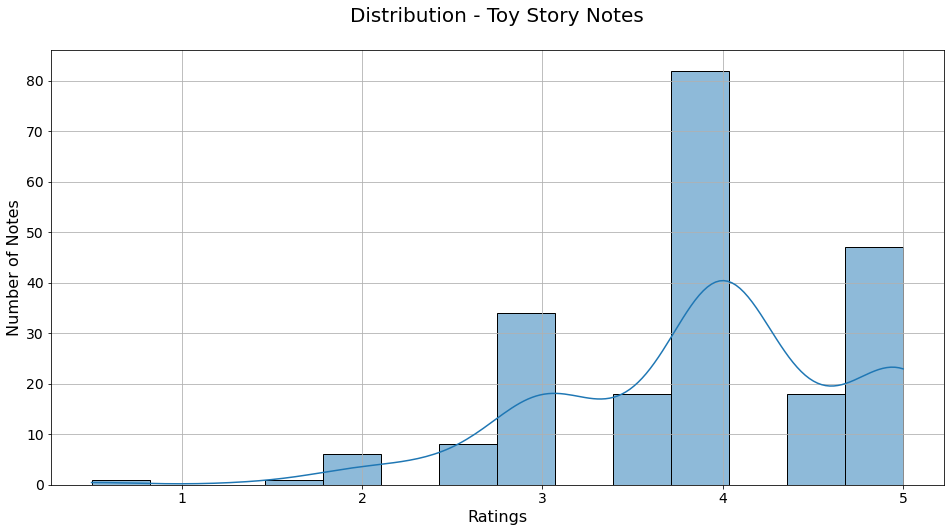

In [52]:
ax = sns.histplot(data = rating1, x = 'rating', kde = True)
ax.figure.set_size_inches(16, 8)
ax.set_title('Distribution - Toy Story Notes', fontsize = 20, y = 1.05)
ax.set_xlabel('Ratings', fontsize = 16)
ax.set_ylabel('Number of Notes', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.grid(True)

### Boxplot - Toy Story Ratings

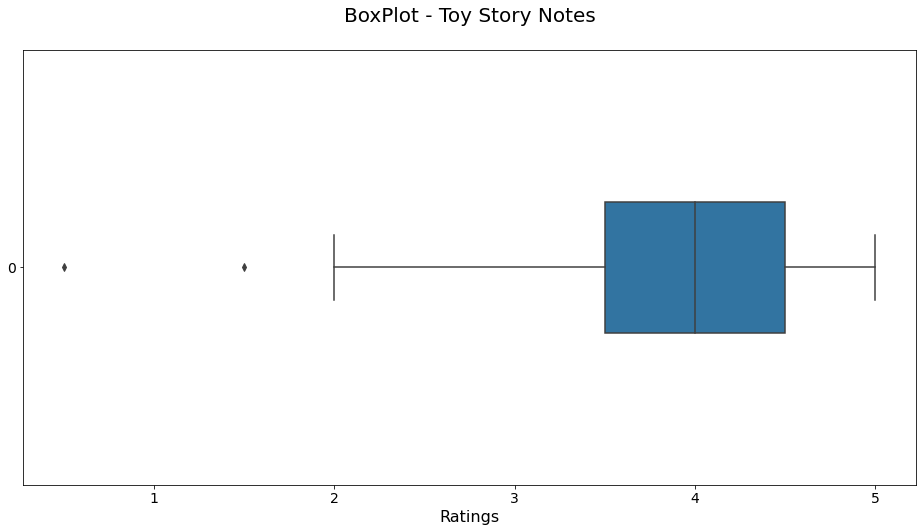

In [53]:
ax = sns.boxplot(data = rating1['rating'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(16, 8)
ax.set_title('BoxPlot - Toy Story Notes', fontsize = 20, y = 1.05)
ax.set_xlabel('Ratings', fontsize = 16)
ax.tick_params(labelsize = 14)

In [54]:
rating1['rating'].mean()

3.9209302325581397

In [55]:
rating1['rating'].median()

4.0

In [56]:
rating1['rating'].count()

215

In [57]:
zconfint(rating1['rating'])

(3.8093359183563402, 4.032524546759939)

### Affirmative Test

> The number below i taked of average calculed some fields above- Where gived this result

In [58]:
general_media_movies = 3.4320503405352603

In [59]:
from statsmodels.stats.weightstats import ztest

ztest(rating1['rating'], value = general_media_movies)

(8.586342305916716, 8.978190401886942e-18)

>The second ztest value is p_value!

> IF the <b>p_value is <= 0.05 </b>, So this value is not egual to general_media

### <font color='blue'>Conclusion</font>

> ### About Toy Story
> ***  
The Toy Story movie has a different average than the average of all the movies

### <font color='blue' style='font-size: 30px;'>Toy Story - Visualizing the change of average over time</font>

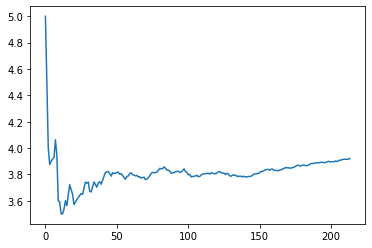

In [60]:
temp = rating1.sample(frac = 1, random_state = 75241)['rating']

medias = [temp[0: i].mean() for i in range(1, len(temp))]
    
plt.plot(medias)

In [61]:
temp = rating1.sample(frac = 1, random_state = 75241)['rating']

def calcule_test(i):
    media = temp[0: i].mean()
    stat, p = ztest(temp[0: i], value = general_media_movies)
    return (i, media, p)

values = np.array([calcule_test(i) for i in range(2, len(temp))])
    
values

array([[2.00000000e+00, 4.50000000e+00, 3.26876211e-02],
       [3.00000000e+00, 4.00000000e+00, 3.25254351e-01],
       [4.00000000e+00, 3.87500000e+00, 2.99521970e-01],
       [5.00000000e+00, 3.90000000e+00, 1.58267818e-01],
       [6.00000000e+00, 3.91666667e+00, 7.40693646e-02],
       [7.00000000e+00, 3.92857143e+00, 3.05837219e-02],
       [8.00000000e+00, 4.06250000e+00, 8.54684682e-03],
       [9.00000000e+00, 3.94444444e+00, 3.43513698e-02],
       [1.00000000e+01, 3.60000000e+00, 6.79775744e-01],
       [1.10000000e+01, 3.59090909e+00, 6.66104056e-01],
       [1.20000000e+01, 3.50000000e+00, 8.45259443e-01],
       [1.30000000e+01, 3.50000000e+00, 8.31972270e-01],
       [1.40000000e+01, 3.53571429e+00, 7.28503654e-01],
       [1.50000000e+01, 3.60000000e+00, 5.56156495e-01],
       [1.60000000e+01, 3.56250000e+00, 6.28416636e-01],
       [1.70000000e+01, 3.64705882e+00, 4.20561961e-01],
       [1.80000000e+01, 3.72222222e+00, 2.69271809e-01],
       [1.90000000e+01, 3.68421

## ploting averages

Text(130, 0.5, '0.05')

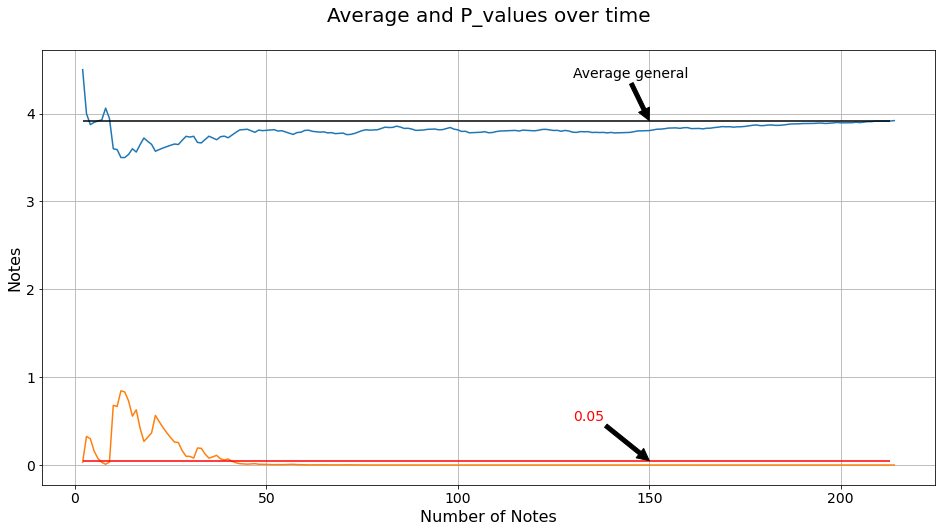

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

ax.plot(values[:, 0], values[:, 1])
ax.plot(values[:, 0], values[:, 2])

ax.set_title('Average and P_values over time', fontsize = 20, y = 1.05)
ax.set_xlabel('Number of Notes', fontsize = 16)
ax.set_ylabel('Notes', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.grid(True)

ax.hlines(y = 0.05, xmin = 2, xmax = len(values), colors = 'red')
ax.hlines(y = temp.mean(), xmin = 2, xmax = len(values), colors = 'k')

ax.annotate(
    'Average general', 
    xy = (150, temp.mean()),
    fontsize = 14,
    xytext = (130, 4.4),
    arrowprops = dict(facecolor='k')
)

ax.annotate(
    '0.05', 
    xy = (150, 0.05),
    fontsize = 14,
    color = 'red',
    xytext = (130, 0.5),
    arrowprops = dict(facecolor='k')
)

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Two sample tests</h1>

## Comparing two sample average 

## z-test

In [63]:
zconfint(rating1['rating'], ratings['rating'])

(0.2799245129192442, 0.5588219849631111)

> The <b>note1 average['rating']</b> is (0.2799245129192442, 0.5588219849631111) more taller than <b>ratings['rating']</b>

In [64]:
ztest(rating1['rating'], ratings['rating']) # -> p_value is the second value

(5.894327101501841, 3.762112778881965e-09)

## t-test

In [65]:
from scipy.stats import ttest_ind

ttest_ind(rating1['rating'], ratings['rating'])

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

> With scipy we get see the p_value, however for more details and more tests is better use the statsmodel

## Statsmodel

[Source](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.get_compare.html#statsmodels.stats.weightstats.DescrStatsW.get_compare)

In [119]:
from statsmodels.stats.weightstats import DescrStatsW

description_all_ratings = DescrStatsW(ratings['rating'])
description_toy_story = DescrStatsW(rating1['rating'])

comparation = description_all_ratings.get_compare(description_toy_story)

comparation.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


### Using DescrStatsW.get_compare with z-test

In [94]:
comparation.summary(use_t = False) #-> Result this case is identical

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


## Box plot two sample

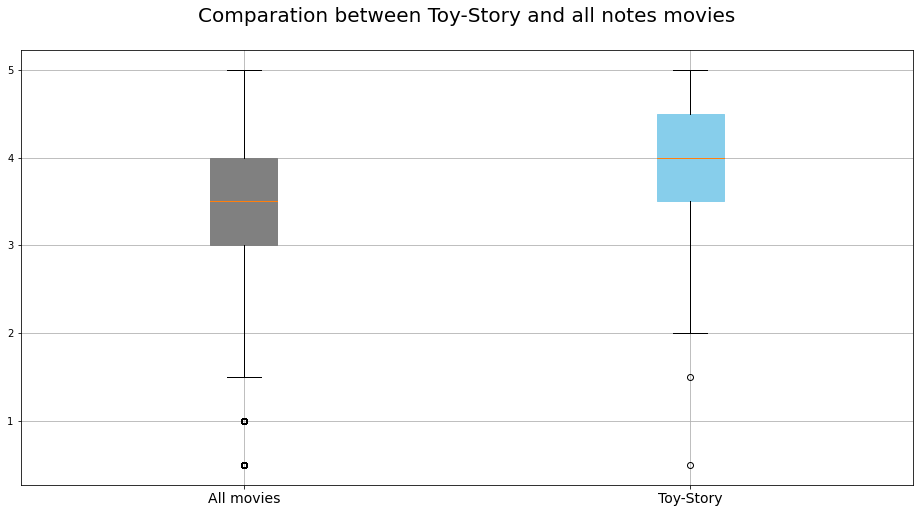

In [116]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

boxes = ax.boxplot([ratings['rating'], rating1['rating']], patch_artist = True)
ax.set_title('Comparation between Toy-Story and all notes movies', fontsize = 20, y = 1.05)
ax.set_xticklabels(['All movies', 'Toy-Story'], fontsize = 14)
ax.grid(True)

colors = ['grey', 'skyblue']
for box, color in zip(boxes['boxes'], colors):
    box.set_color(color)

ax;

## Beware of sample size

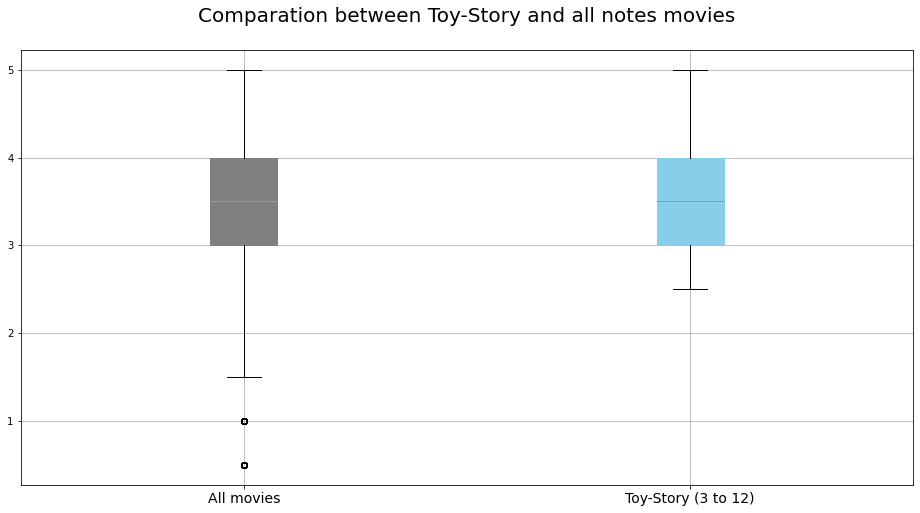

In [118]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

boxes = ax.boxplot([ratings['rating'], rating1['rating'][3:12]], patch_artist = True)
ax.set_title('Comparation between Toy-Story and all notes movies', fontsize = 20, y = 1.05)
ax.set_xticklabels(['All movies', 'Toy-Story (3 to 12)'], fontsize = 14)
ax.grid(True)

colors = ['grey', 'skyblue']
for box, color in zip(boxes['boxes'], colors):
    box.set_color(color)

ax;

In [124]:
from statsmodels.stats.weightstats import DescrStatsW

description_all_ratings = DescrStatsW(ratings['rating'])
description_toy_story = DescrStatsW(rating1['rating'][3:12])

comparation = description_all_ratings.get_compare(description_toy_story)

comparation.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627
